In [1]:
# IMport libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Loading dataset
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\datasets\\flavors_of_cacao.csv')

In [3]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
df.columns = ['Company', 'Bean Origin', 'REF', 'Review Year', 'Cocoa%',\
             'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin' ]

In [5]:
df.head()

,Company,Bean Origin,REF,Review Year,Cocoa%,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [6]:
# Let's check missing values
df.isnull().sum()

Company              0
Bean Origin          0
REF                  0
Review Year          0
Cocoa%               0
Company Location     0
Rating               0
Bean Type            1
Broad Bean Origin    1
dtype: int64

##### Distplot of Rating

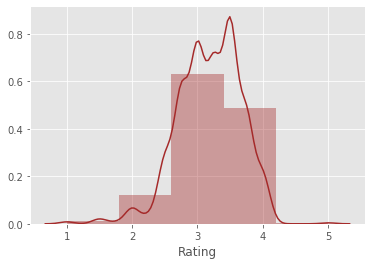

In [11]:
sns.distplot(df['Rating'], bins=5, color='brown')

The distribution of rating is somewhat skewed . There is a higher percentage of 3 & 4 rating and very low percentage of 1 and 5 rating

In [12]:
# Extract the cocoa percentage(Cocao%) in chocolates for further analysis
df['Cocoa% as num'] = df['Cocoa%'].apply(lambda x: x.split('%')[0])
df['Cocoa% as num'] = df['Cocoa% as num'].astype(float)

Cocoa is he key ingredient of any chocolate. Now, lets look at the distribution of cocoa%.

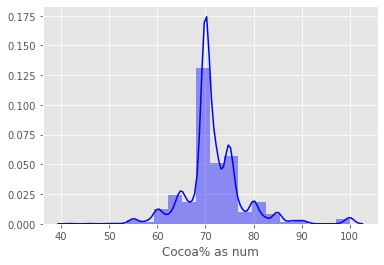

In [14]:
sns.distplot(df['Cocoa% as num'], bins = 20, color='b')

We see a normal distribution with most of the chocolates haveing 70% cocoa in them

#### Now let's see if the review year has any effect on rating

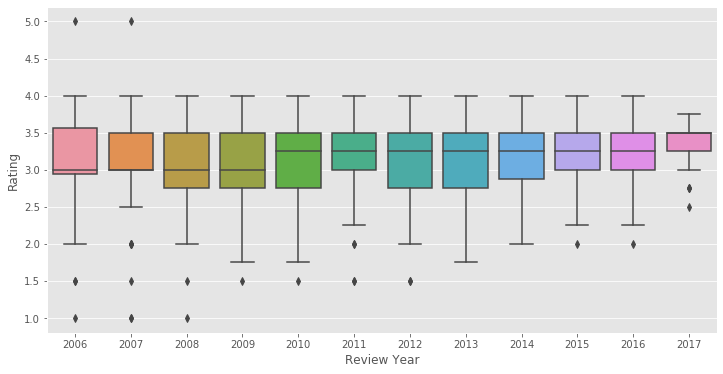

In [16]:
df['Review Year'] = df['Review Year'].astype(str)

plt.figure( figsize=(12,6))
sns.boxplot(x='Review Year', y = 'Rating', data = df)

There is an interesting trend in the Rating. From the years 2006 to 2009, the median of the Ratings is consistent around 3. There is a jump in the median to a value of 3.3 from 2010 and it remained around 3.3 until 2016.



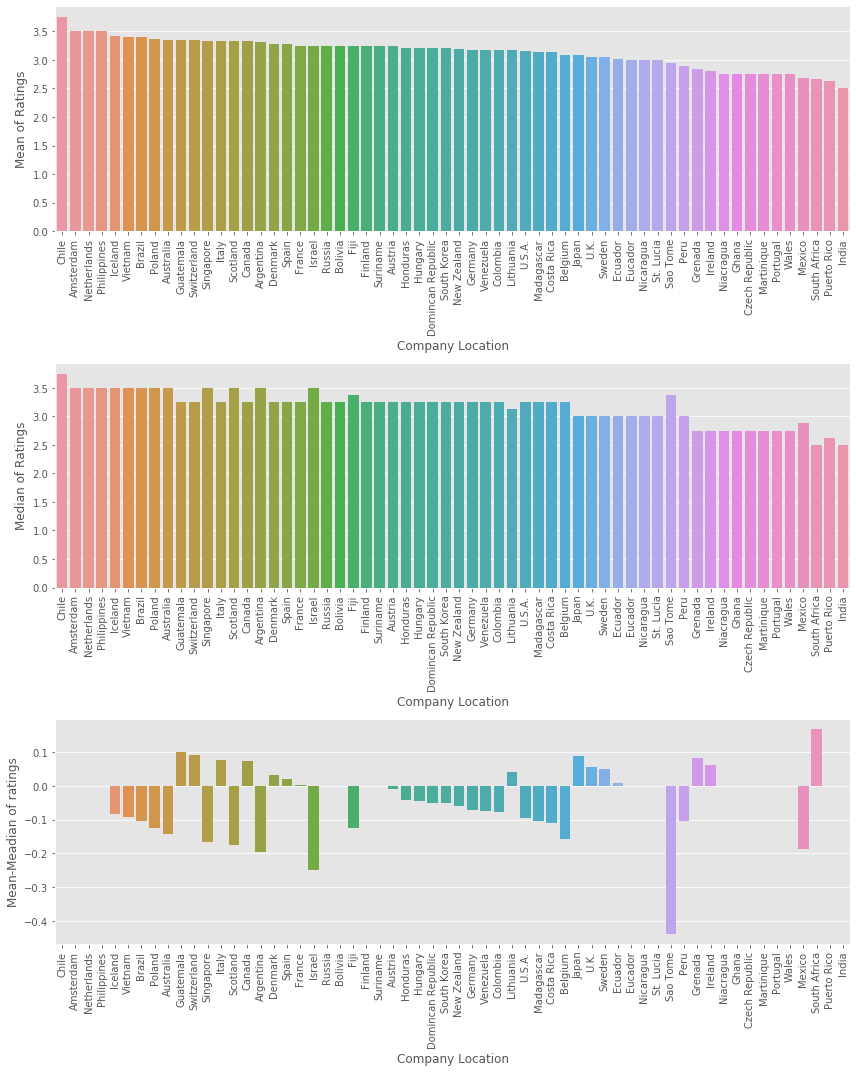

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize=(12, 15))

a= df.groupby(['Company Location'])['Rating'].mean()
a= a.sort_values(ascending = False)

b = df.groupby(['Company Location'])['Rating'].median()
b = b.sort_values(ascending = False)

a = pd.DataFrame(a)
b = pd.DataFrame(b)

Rat_by_location =  a.join(b, how='left', lsuffix= '_mean', rsuffix= '_median')
Rat_by_location['Mean-Median'] = Rat_by_location['Rating_mean'] - Rat_by_location['Rating_median']

Rat_diff = sns.barplot(x = Rat_by_location.index, y=Rat_by_location['Mean-Median'], ax= ax3)
Rat_diff.set_xticklabels(labels = Rat_by_location.index, rotation = 90)
Rat_diff.set_ylabel('Mean-Meadian of ratings')
Rat_diff.set_xlabel('Company Location')

Rat_mean = sns.barplot(x=Rat_by_location.index, y = Rat_by_location['Rating_mean'], ax= ax1)
Rat_mean.set_xticklabels(labels = Rat_by_location.index, rotation= 90)
Rat_mean.set_ylabel('Mean of Ratings')
Rat_mean.set_xlabel('Company Location')

Rat_median = sns.barplot(x=Rat_by_location.index, y = Rat_by_location['Rating_median'], ax = ax2)
Rat_median.set_xticklabels(labels = Rat_by_location.index, rotation= 90)
Rat_median.set_ylabel('Median of Ratings')
Rat_median.set_xlabel('Company Location')

plt.tight_layout()

From the above visualizations, we can see that there is no much difference between mean and median of the data except for the company that's located in Sao Tome.

A very important observation is that, Rating seems to be dependent on the country of company location. We can spot several European and South American countries with a higher mean Rating, this could be due to the availability of Cocoa in these countries. The availability cocoa can influence the percentage of Cocoa used in the chocolates at these companies.

### Now let's look at the cocoa% used on different company location

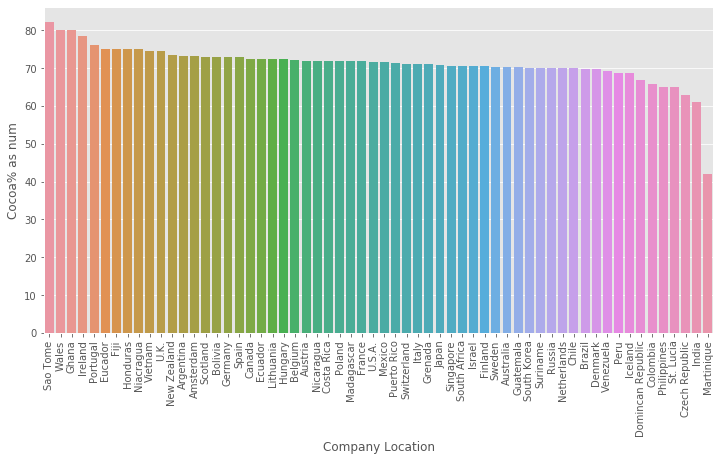

In [35]:
plt.figure( figsize=(12,6))

c = df.groupby('Company Location')['Cocoa% as num'].mean()
c = c.sort_values(ascending = False)

ratings = sns.barplot(x= c.index, y = c)
ratings.set_xticklabels(labels = c.index, rotation = 90)
plt.show()

#### Rating might be influenced by Bean Type and Broad Bean Origin, so let's visualize them

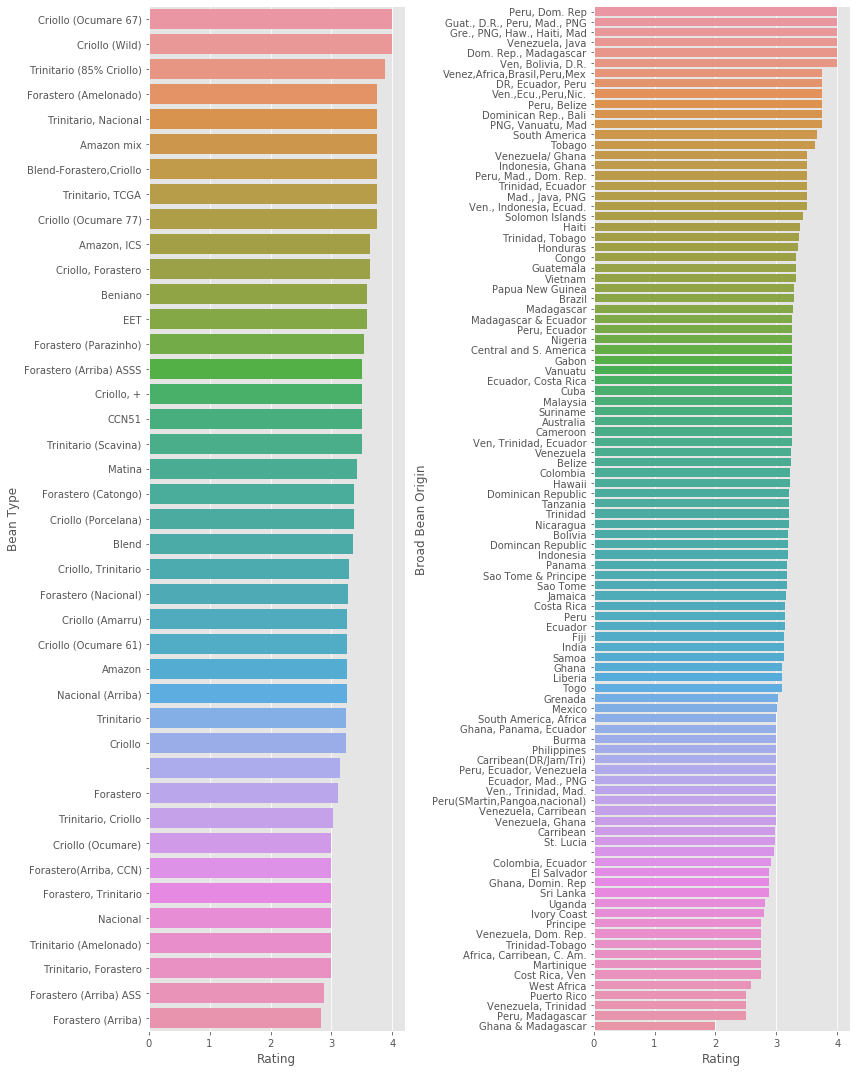

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize= (12, 15))

e = df.groupby('Bean Type')['Rating'].mean()
e = e.sort_values(ascending = False)
Rat_bean_type = sns.barplot(y = e.index, x= e, ax = ax1)

f = df.groupby('Broad Bean Origin')['Rating'].mean()
f = f.sort_values(ascending= False)
Rat_broad_bean_type = sns.barplot(y = f.index, x= f, ax = ax2)

plt.tight_layout()

We have chosen Cocoa percentage, Review date, Rating, Broad bean origin, Company location to be included in the training data for our clustering model.

The clustering technique we will be using is DBScan

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

In [38]:
df.head()

,Company,Bean Origin,REF,Review Year,Cocoa%,Company Location,Rating,Bean Type,Broad Bean Origin,Cocoa% as num
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,63.0
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo,70.0
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo,70.0
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo,70.0
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru,70.0


In [47]:
df1 = df[['Cocoa% as num', 'Rating', 'Review Year']]

In [49]:
non_num = ['Review Year']

for i in non_num:
    x1 = pd.get_dummies(df1[i])
    df1 = df1.join(x1, lsuffix= '_l', rsuffix = '_r')
    df1.drop(i, axis=1, inplace= True)

In [50]:
df1.head()

,Cocoa% as num,Rating,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,63.0,3.75,0,0,0,0,0,0,0,0,0,0,1,0
1,70.0,2.75,0,0,0,0,0,0,0,0,0,1,0,0
2,70.0,3.00,0,0,0,0,0,0,0,0,0,1,0,0
3,70.0,3.50,0,0,0,0,0,0,0,0,0,1,0,0
4,70.0,3.50,0,0,0,0,0,0,0,0,0,1,0,0


### Standarization

In [51]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [52]:
df_sc = StandardScaler().fit_transform(df1)